# Data Processing
+ 17 features, 8950 samples

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.style as ms
ms.use('default')
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [25]:
def get_droped_data(path):
    data=pd.read_csv("CC GENERAL.csv")
    data=data.dropna(how='any')
    data=data.drop(["CUST_ID","PURCHASES","PURCHASES_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX"],axis=1) # 0是每一列中的每一行进行操作，1是每一行的每一列进行操作
    return data
# 读取数据
data=pd.read_csv("CC GENERAL.csv")
data


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [27]:
# 去除有缺失的值
data[data.isnull().values==True]
data=data.dropna(how='any')
data[data.isnull().values==True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [28]:
# 去除重复值
data[data.duplicated().values==True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [29]:
# 数据描述
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [30]:
# 去除多余的列
data=data.drop(["CUST_ID","PURCHASES","PURCHASES_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX"],axis=1) # 0是每一列中的每一行进行操作，1是每一行的每一列进行操作
data

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.00,95.40,0.000000,0.000000,0.083333,0.000000,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,0.000000,0.000000,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.000000,0.000000,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,0.00,1333.28,0.000000,0.000000,0.583333,0.000000,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,0.00,0.000000,0.166667,0.000000,0.000000,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,0.00,291.12,0.000000,0.000000,0.833333,0.000000,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,0.00,144.40,0.000000,0.000000,0.666667,0.000000,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,500.0,52.549959,55.755628,0.250000,6


<IPython.core.display.Javascript object>

d:\vscode\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


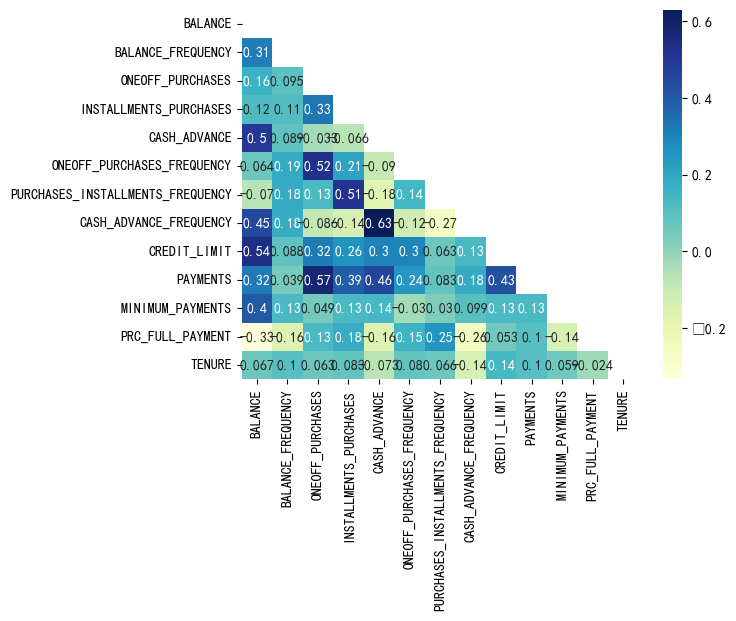

In [31]:
data.corr
ax = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=np.triu(data.corr()))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


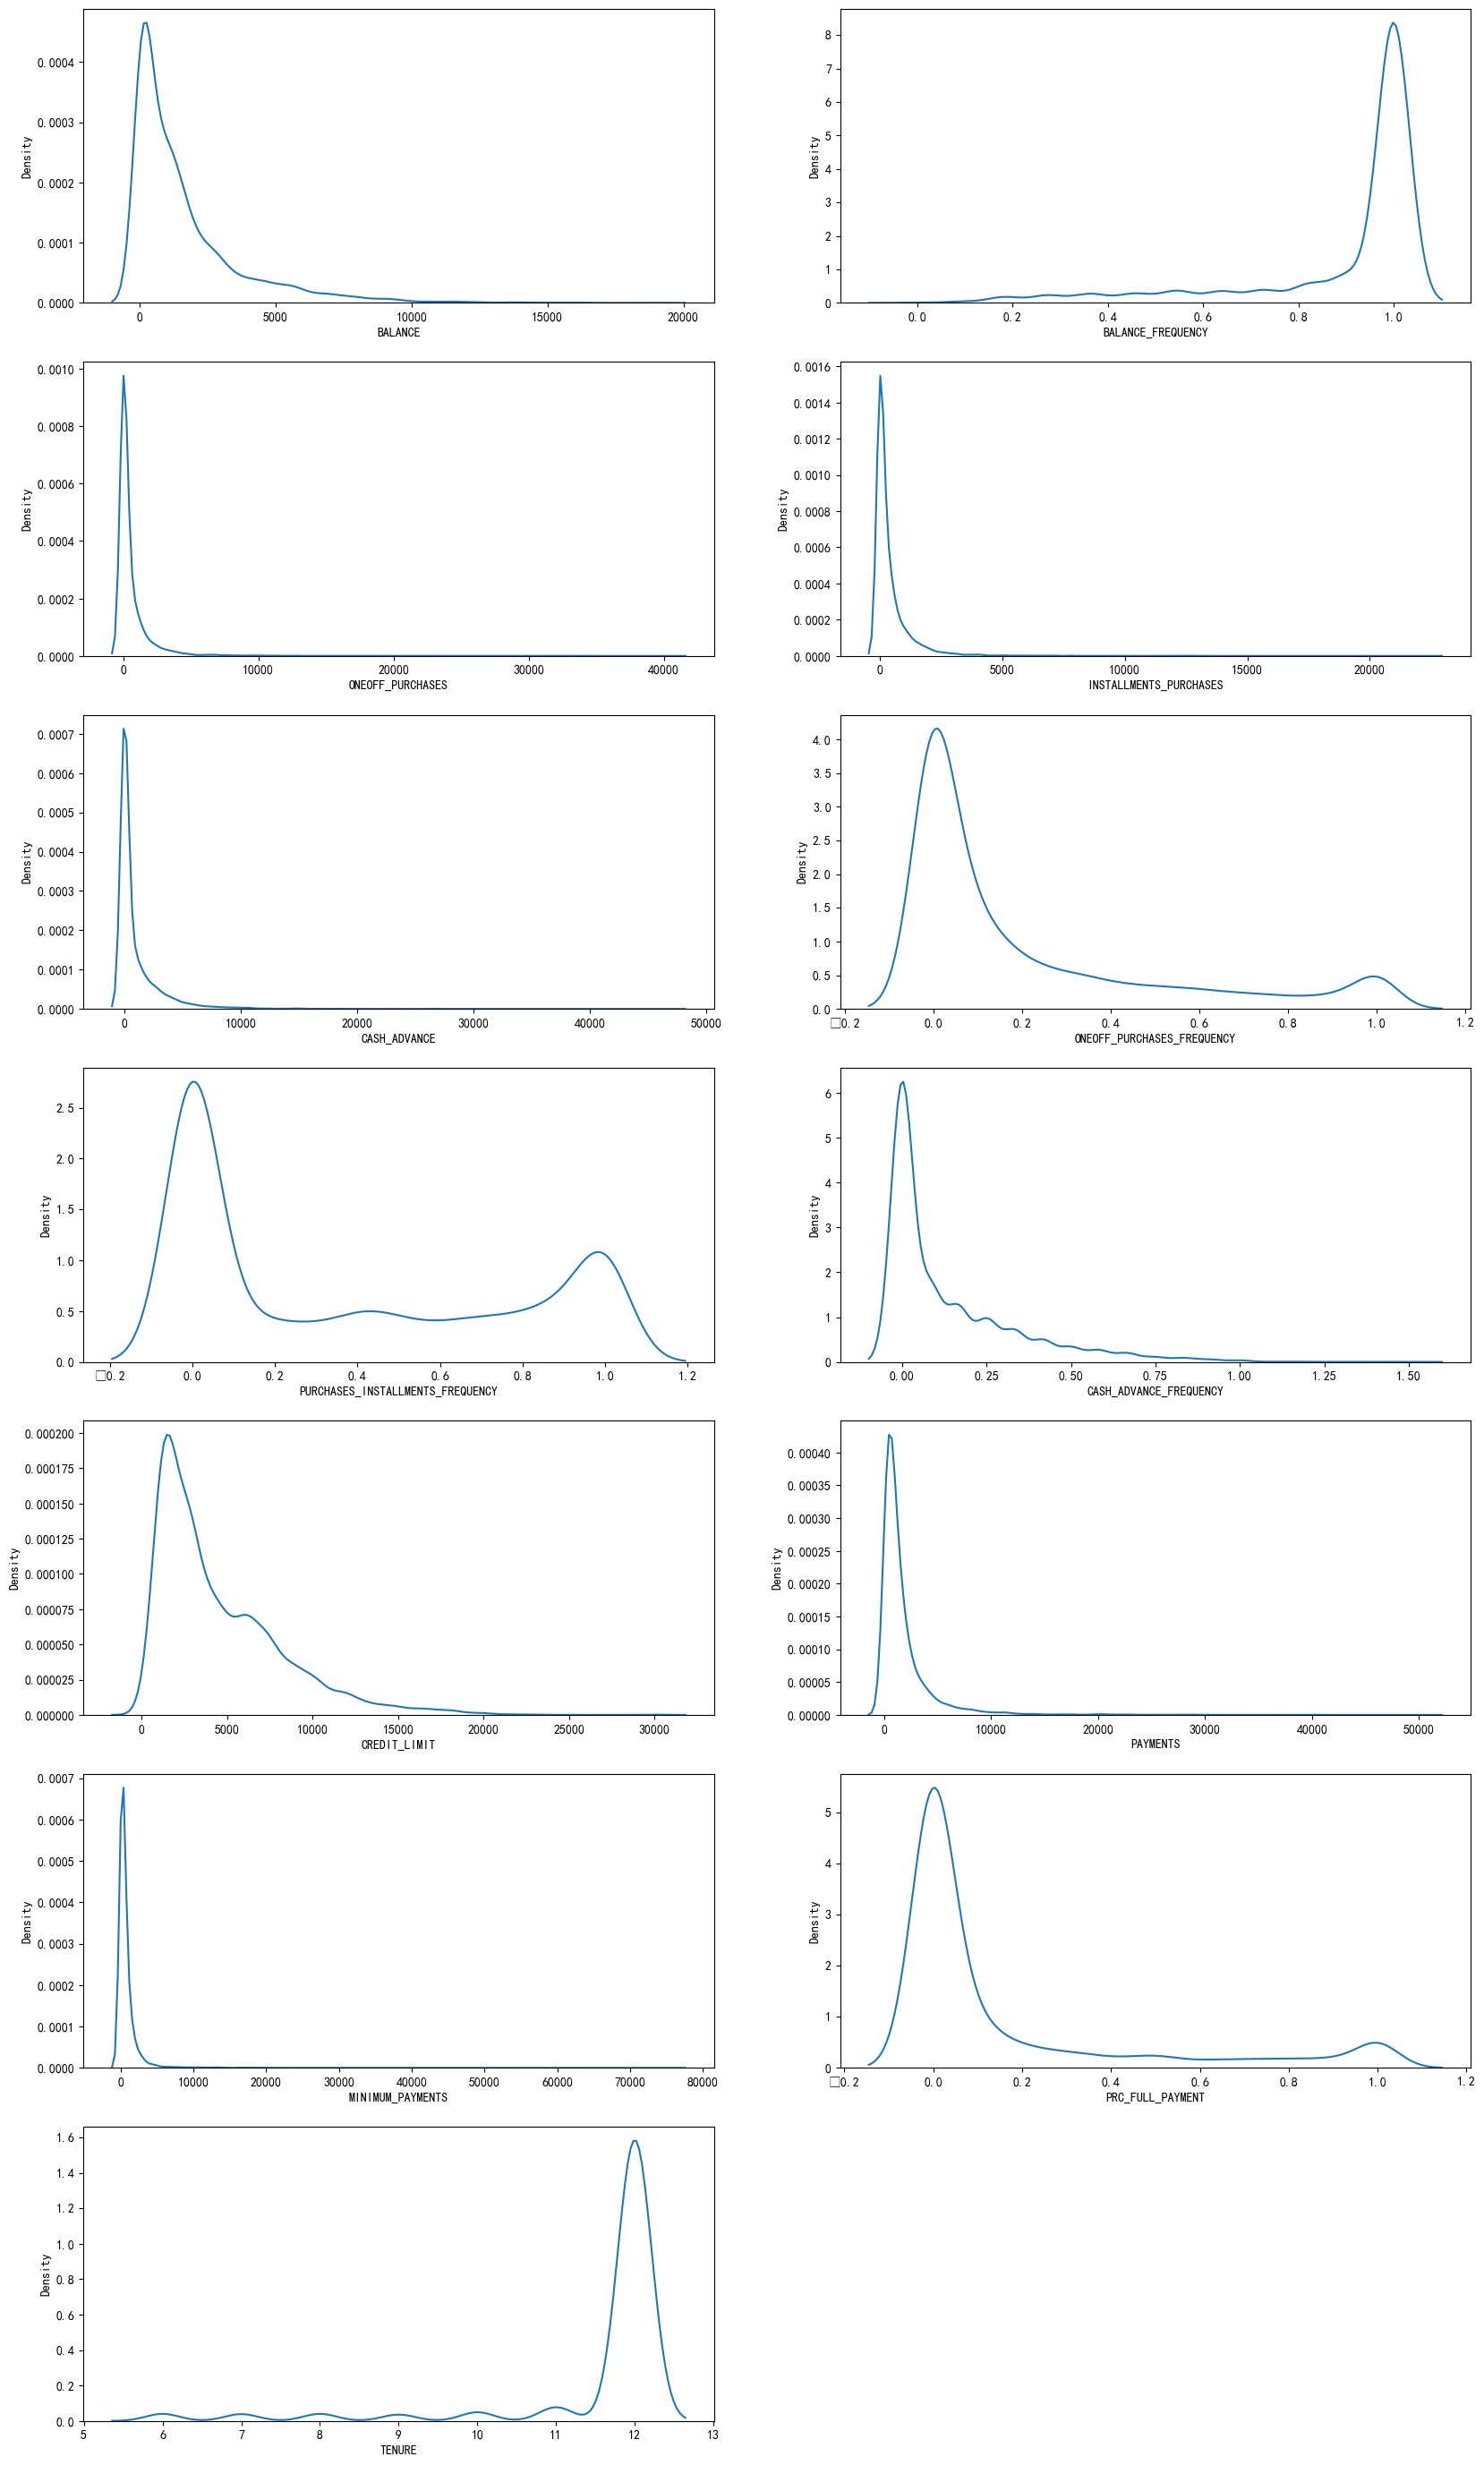

In [32]:
# visualization
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(7, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for col in cols:
    data[col] = np.log(1 + data[col])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


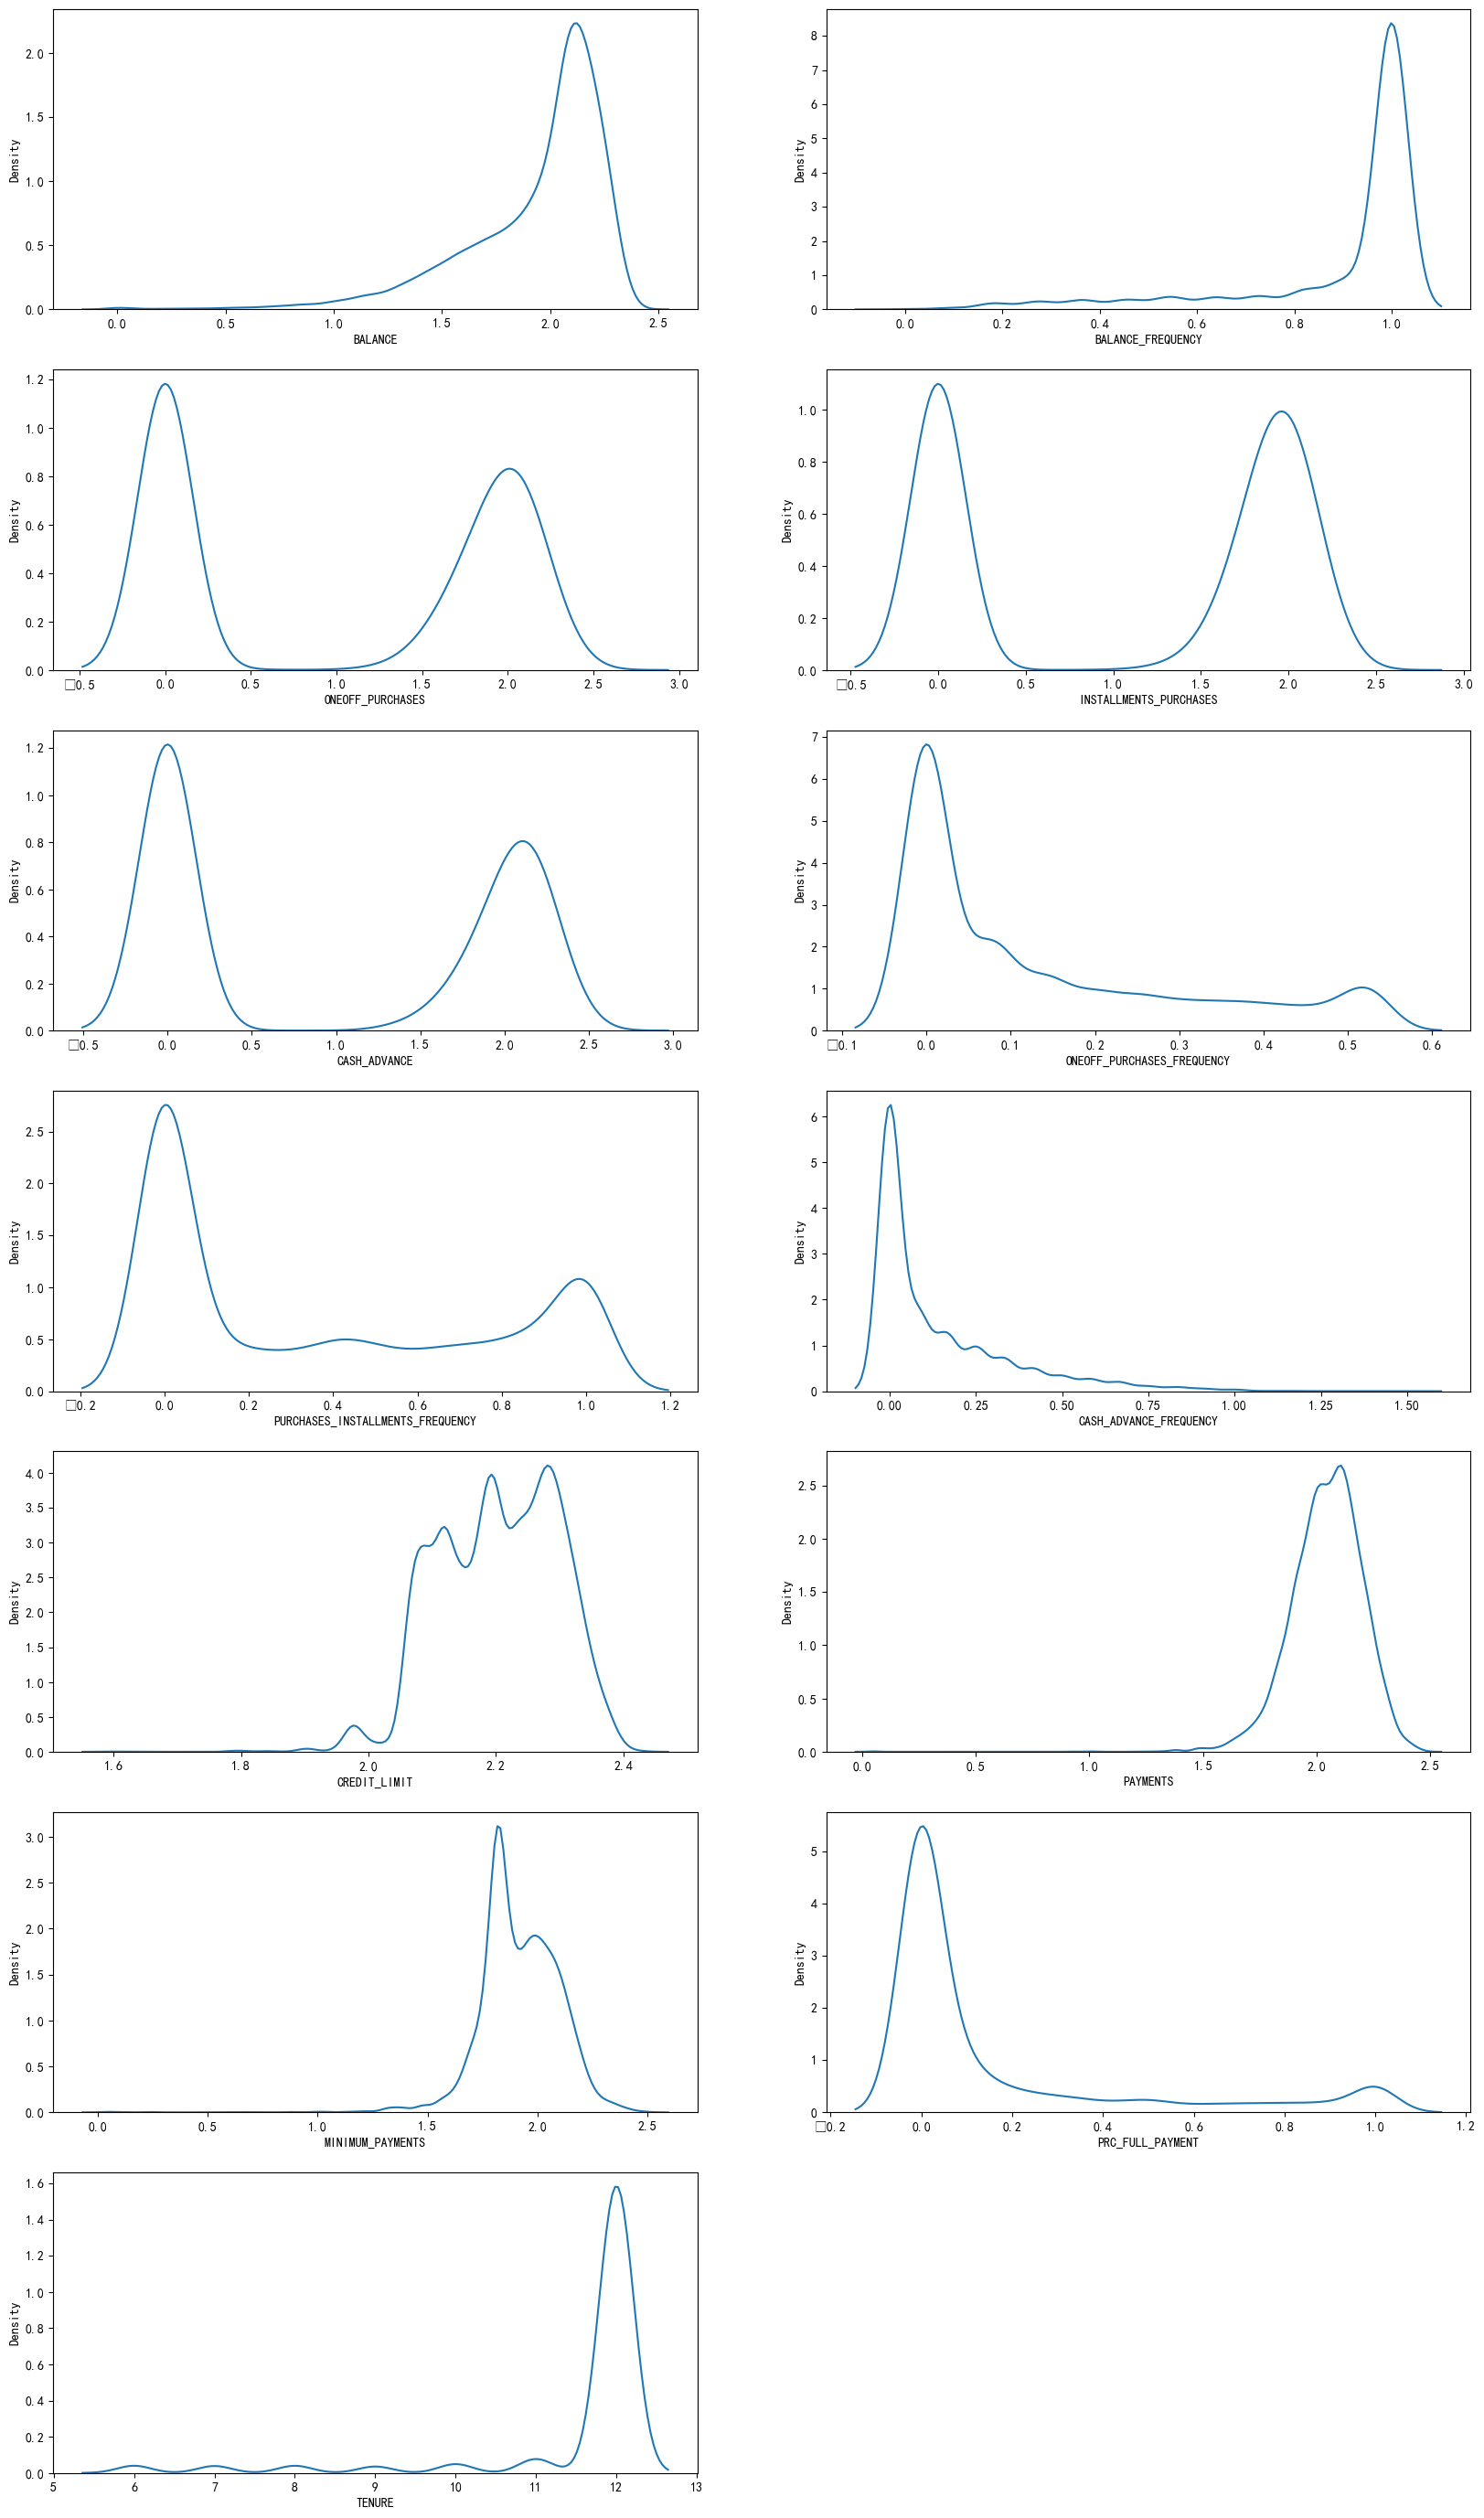

In [33]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
# Eliminate an order of magnitude impact
for col in cols:
    data[col] = np.log(1 + data[col])
    
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(7, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        


In [34]:
# 标准化有数量级的列
from sklearn.preprocessing import StandardScaler#标准化，返回值为标准化后的数据
from sklearn.preprocessing import Normalizer
# pre_values=data.loc[:,["BALANCE",'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']]

# std_scl = StandardScaler()
# std_values=std_scl.fit_transform(pre_values)
# std_values.shape

nm_scl=Normalizer()
X=nm_scl.fit_transform(data)
# data
X.shape

(8636, 13)

# Plotting function

In [35]:
def red_dim_plot2(red_model,data):
    """dimensional reduction and plot"""
    trans_data=red_model.fit_transform(data)
    fig,ax=plt.subplots()
    fig.set_facecolor('w')
    ax.scatter(trans_data[:,0],trans_data[:,1],alpha=0.5)
    return trans_data
    
def dbscan_clst_plot2(eps,min_samples,trans_data):
    """DBSCAN clustering and plot """
    dbscan_model=DBSCAN(eps=eps,min_samples=min_samples,n_jobs=-1)
    labels=dbscan_model.fit_predict(trans_data)
    fig1,ax1=plt.subplots()
    fig1.set_facecolor('w')
    ax1.scatter(trans_data[:,0],trans_data[:,1],c=labels,alpha=0.5)
    return dbscan_model

def kmeans_clst_plot2(trans_data):
    """K-means clustering and plot """
    from sklearn.cluster import KMeans
    from yellowbrick.cluster import KElbowVisualizer
    # elbow method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,10),dpi=200)
    visualizer.fit(trans_data)
    visualizer.show()
    # clustering and plot
    model=KMeans(n_clusters=visualizer.elbow_value_)
    labels=model.fit_predict(trans_data)
    fig1,ax1=plt.subplots()
    fig1.set_facecolor('w')
    ax1.scatter(trans_data[:,0],trans_data[:,1],c=labels,alpha=0.5)
    return model
    



# PCA

<IPython.core.display.Javascript object>

0.6748625773641881

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


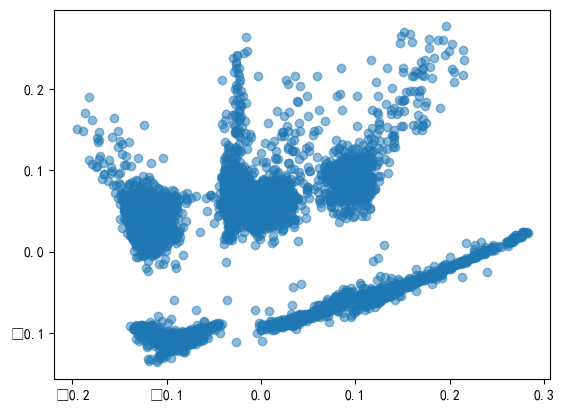

In [36]:
# transforming it into 2 dimensions and scattering
pca2=PCA(n_components=2)
trans_data=pca2.fit_transform(X)
fig,ax=plt.subplots()
fig.set_facecolor('w')
ax.scatter(trans_data[:,0],trans_data[:,1],alpha=0.5)

# model=dbscan_clst_plot2(eps=0.1,min_samples=50,trans_data=trans_data)

# 72.3% information are included
np.sum(pca2.explained_variance_ratio_)

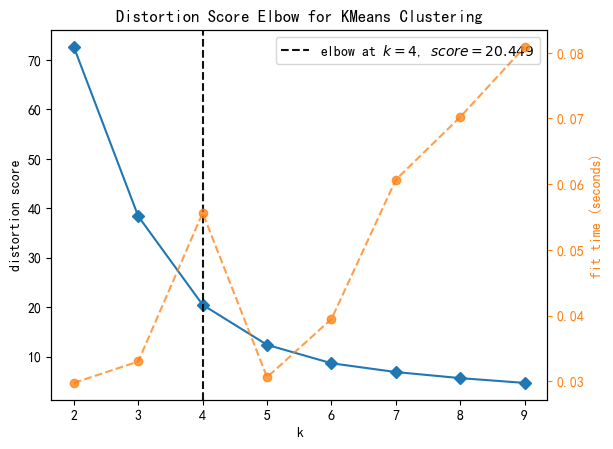

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


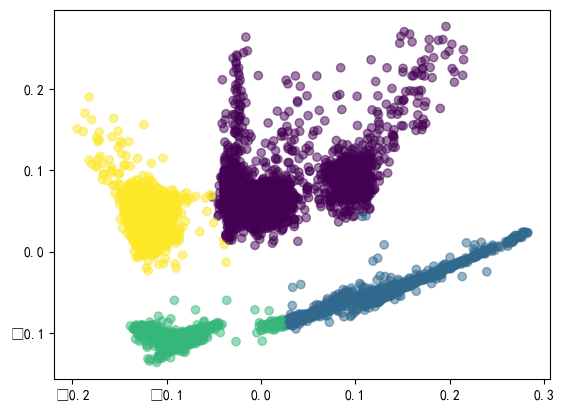

In [37]:
kmeans_model=kmeans_clst_plot2(trans_data)

In [38]:
ori_data=get_droped_data('CC GENERAL.csv')
ori_data
# show the result
ori_data['pca_label']=kmeans_model.labels_
ori_data.groupby('pca_label').describe()['INSTALLMENTS_PURCHASES']

,count,mean,std,min,25%,50%,75%,max
pca_label,,,,,,,,
0,2768.0,279.172178,726.971376,0.0,0.0000,0.00,233.9100,13184.43
1,2377.0,85.430231,403.639784,0.0,0.0000,0.00,0.0000,14686.10
2,1754.0,563.877742,903.952374,0.0,170.0375,346.16,637.1175,22500.00
3,1737.0,961.166920,1339.991600,0.0,228.1900,545.05,1176.1600,15497.19


d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


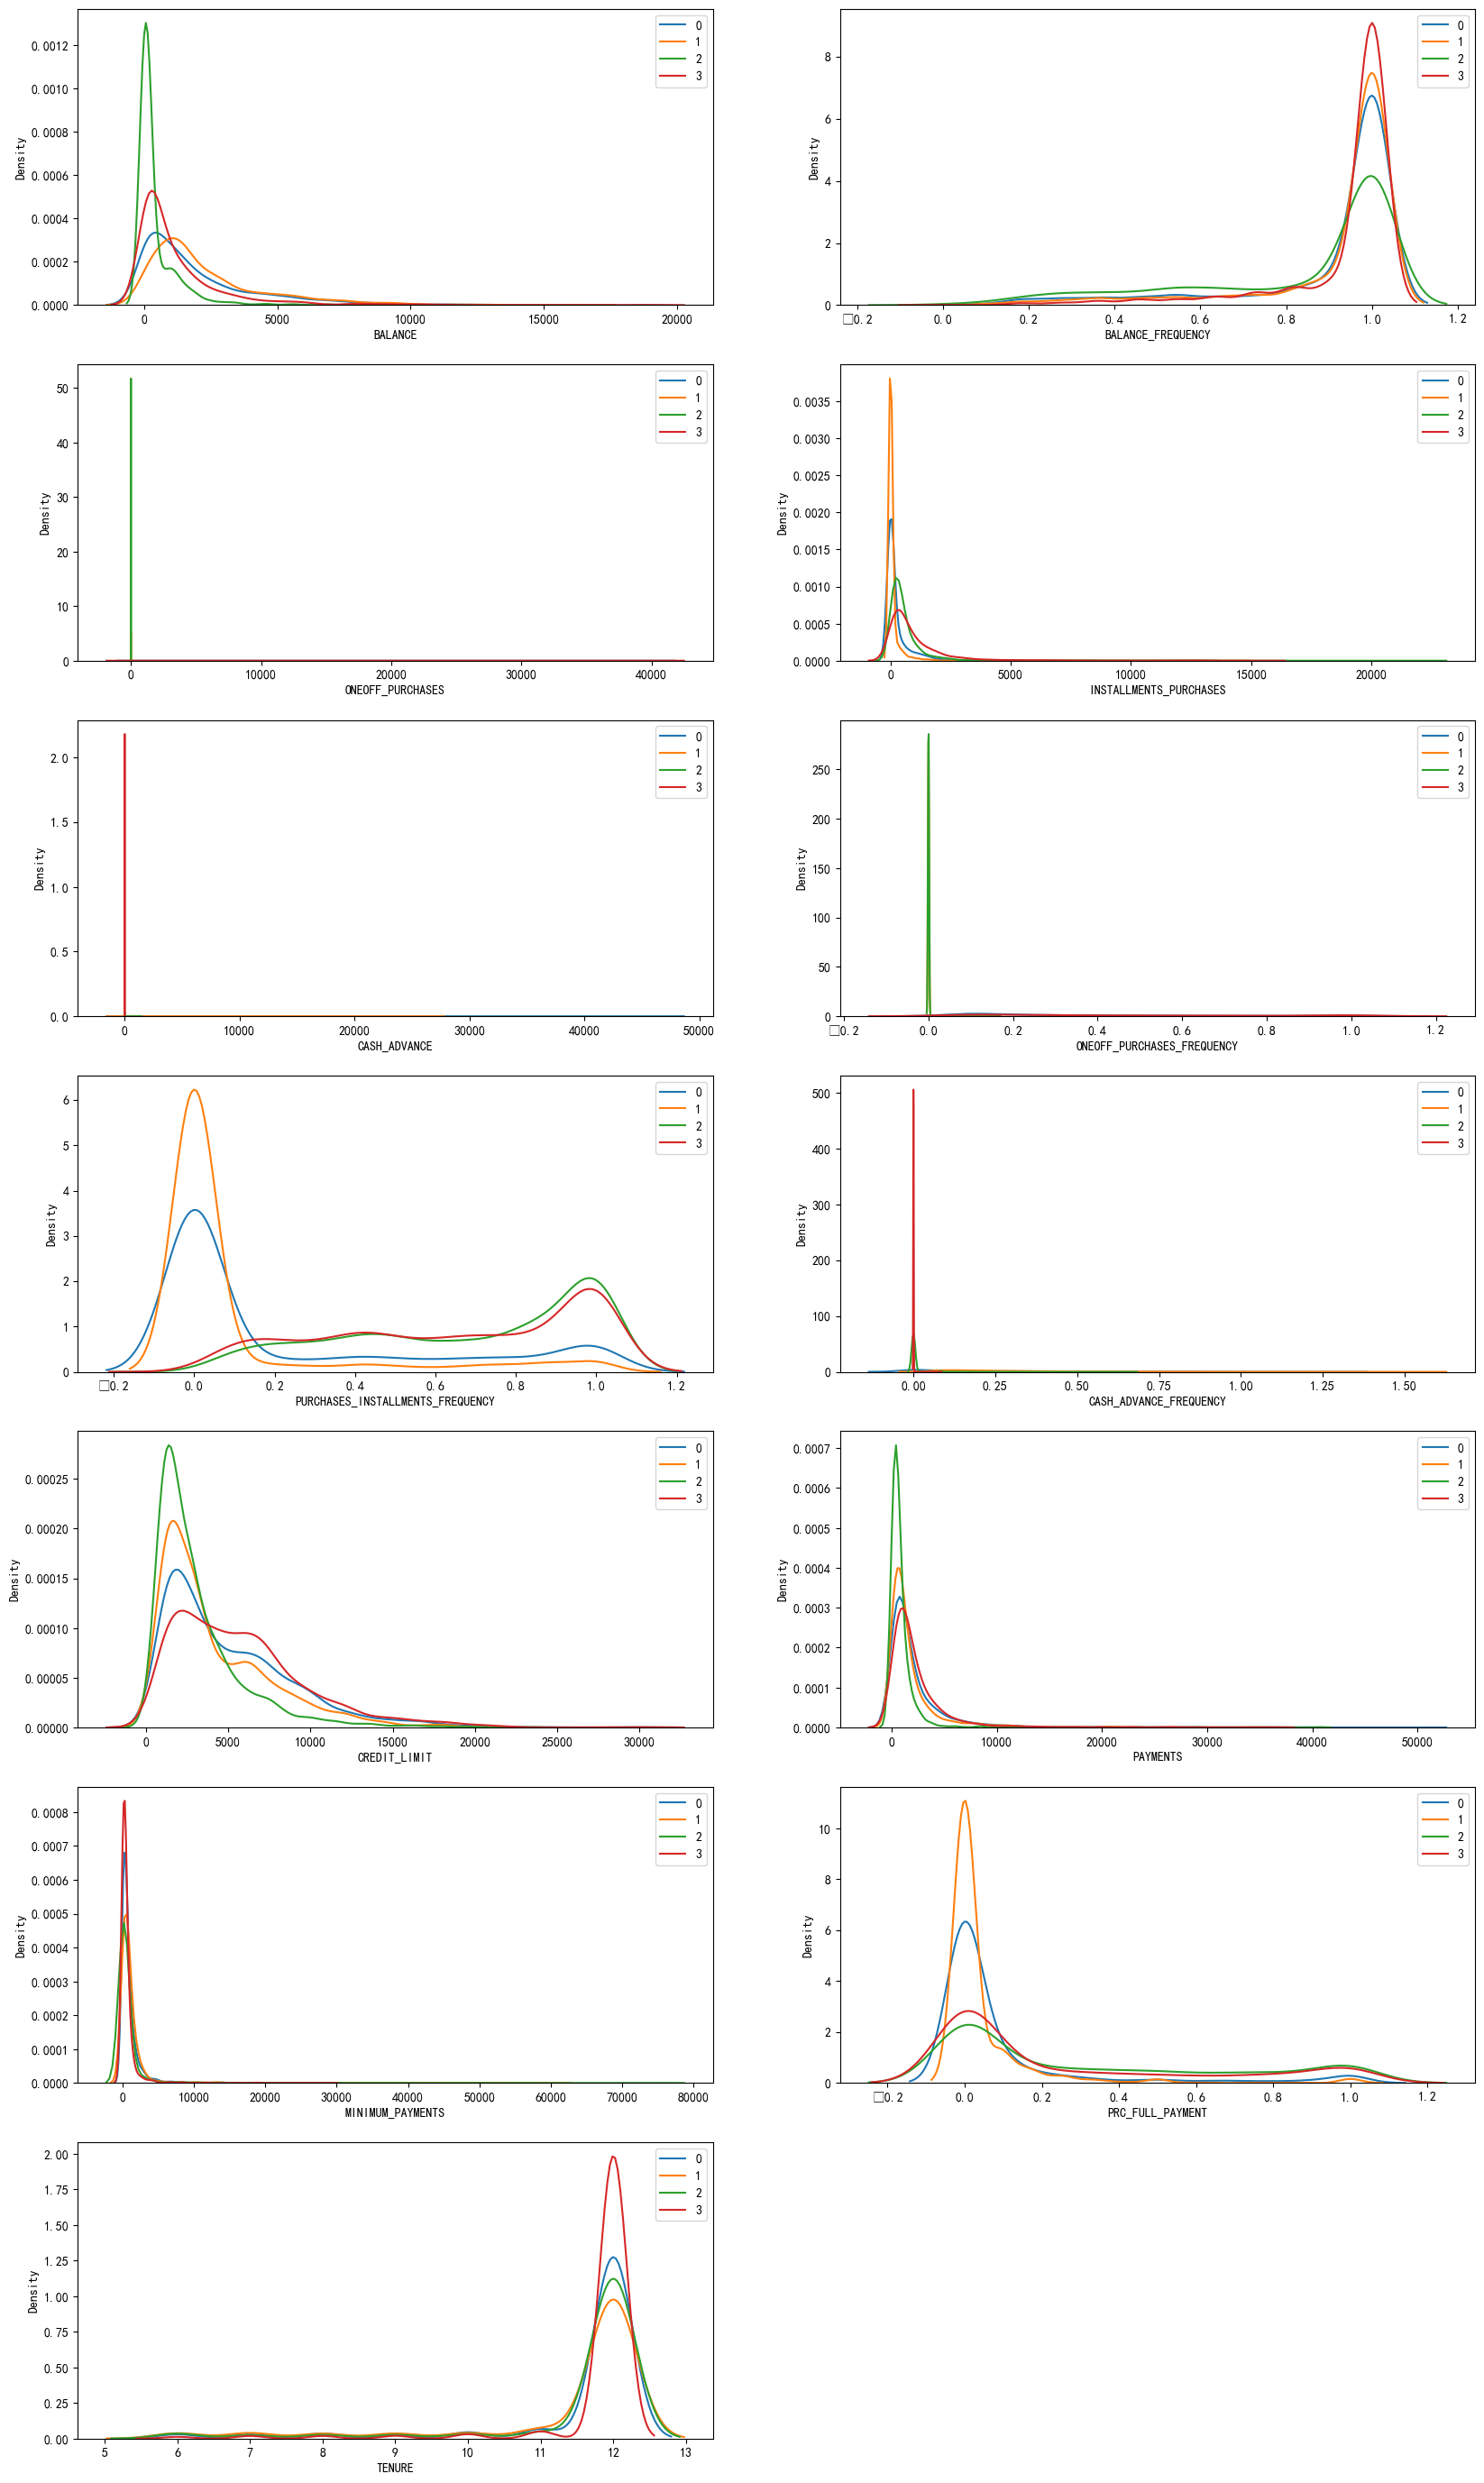

In [39]:
# 画每一feature的4个种类的概率密度图
ori_data=get_droped_data('CC GENERAL.csv')
ori_data['pca_label']=kmeans_model.labels_
plt.figure(figsize=(20,35))
for i,col in enumerate(data.columns):
    if col!='pca_label':
        kdes=[]
        for j,label in enumerate(set(kmeans_model.labels_)):
            # ax=axes[i,j]
            ax=plt.subplot(7,2,i+1)
            kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,col],ax=ax,label=label)
            plt.legend()

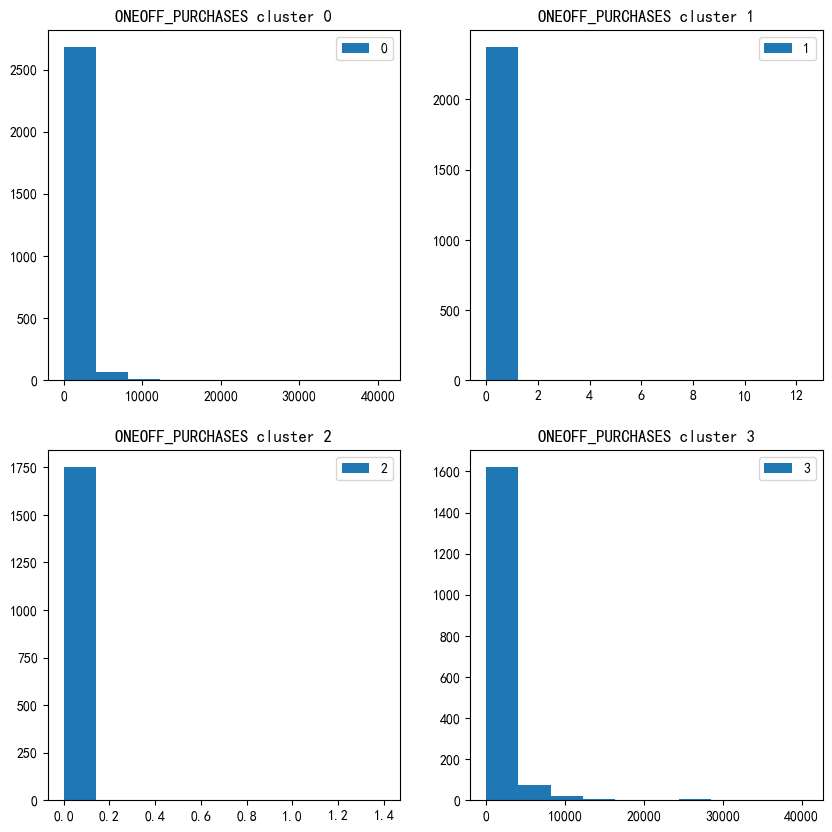

In [40]:
# ONEOFF_PURCHASES hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model.labels_)):
        # ax=axes[i,j]
        ax=plt.subplot(2,2,j+1)
        # kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],ax=ax,label=label)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],label=label)
        ax.set_title(f"ONEOFF_PURCHASES cluster {label}")
        plt.legend()

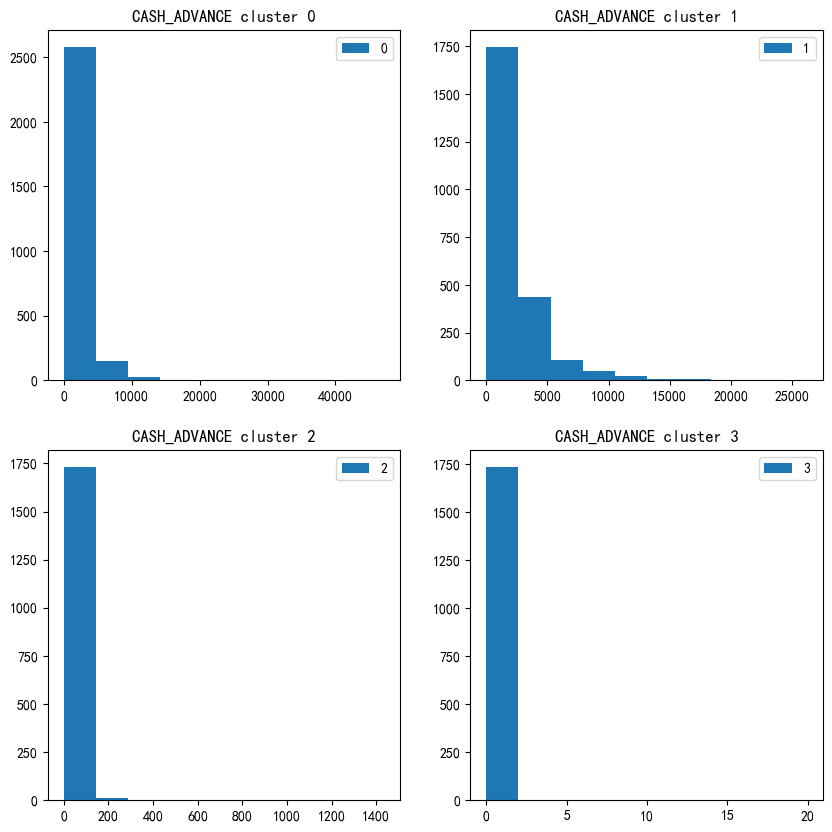

In [49]:
# ONEOFF_PURCHASES hist
plt.figure(figsize=(10,10))
for j,label in enumerate(set(kmeans_model.labels_)):
        # ax=axes[i,j]
        ax=plt.subplot(2,2,j+1)
        # kde=sns.kdeplot(ori_data.loc[ori_data['pca_label']==label,'ONEOFF_PURCHASES'],ax=ax,label=label)
        ax.hist(ori_data.loc[ori_data['pca_label']==label,'CASH_ADVANCE'],label=label)
        ax.set_title(f"CASH_ADVANCE cluster {label}")
        plt.legend()

In [47]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# T-SNE

d:\vscode\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\vscode\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


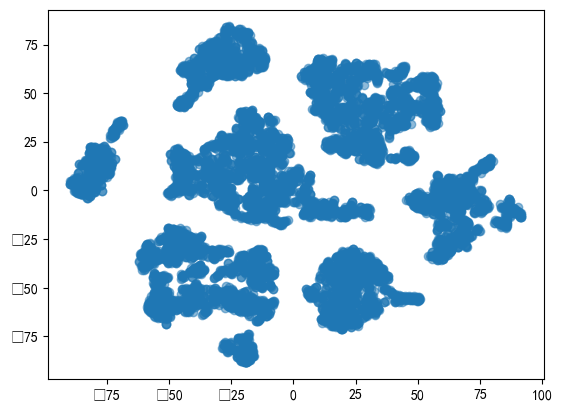

In [41]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2)  # 降维度至二维

t_trans_data=red_dim_plot2(tsne2,X)

{0, 1, 2, 3, 4, 5, 6}

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


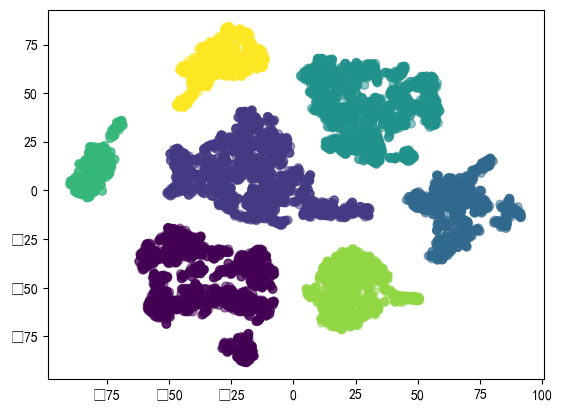

In [42]:
model=dbscan_clst_plot2(eps=9,min_samples=30,trans_data=t_trans_data)
set(model.labels_)

# Spectral Embedding

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


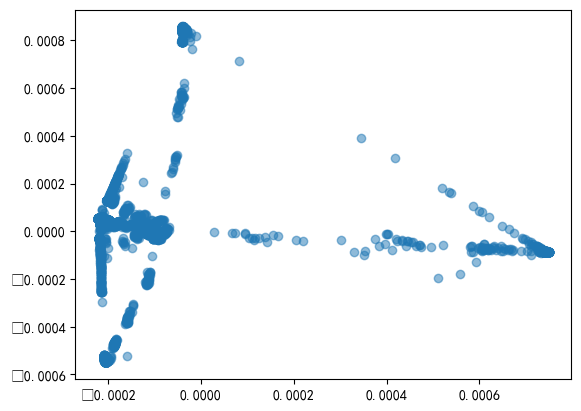

In [43]:
from sklearn.manifold import SpectralEmbedding

SE=SpectralEmbedding(n_components=2)

se_transdata=red_dim_plot2(SE,data)


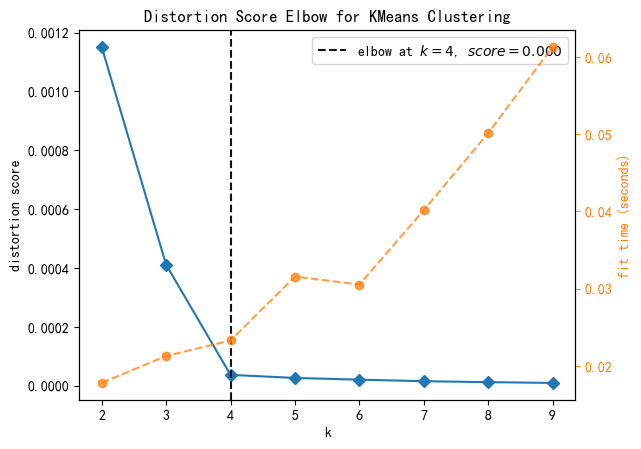

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


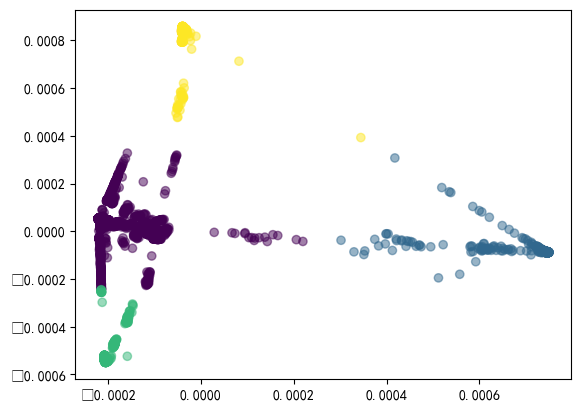

In [44]:
model=kmeans_clst_plot2(se_transdata)

# Isomap

d:\vscode\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 32 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\vscode\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\vscode\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\vscode\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\vscode\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing 

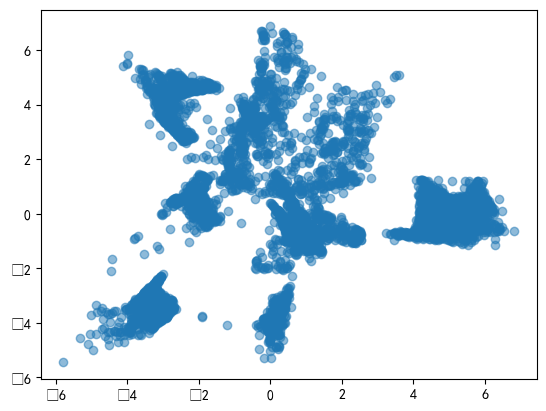

In [45]:
from sklearn.manifold import Isomap

iso2=Isomap(n_components=2)
iso_transdata=red_dim_plot2(iso2,data)

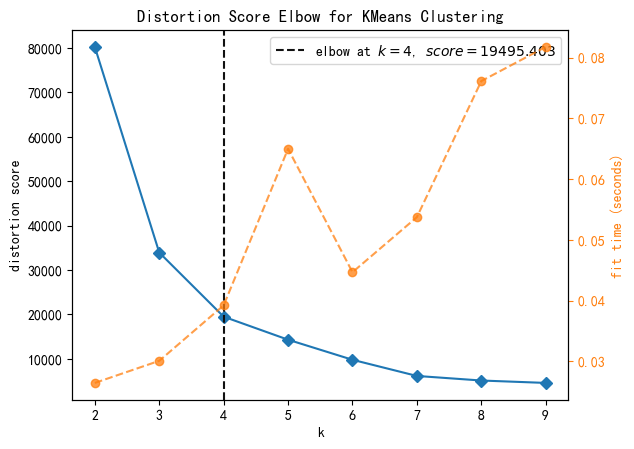

{0, 1, 2, 3}

d:\vscode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


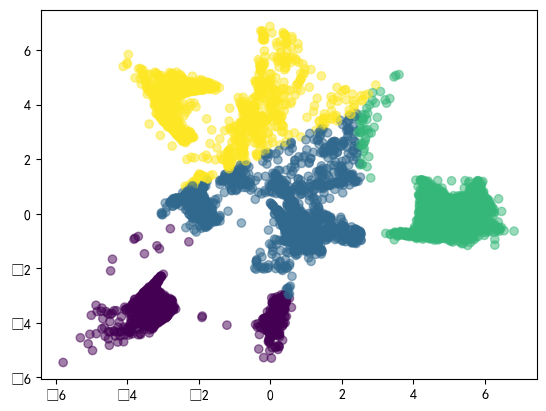

In [46]:
model=kmeans_clst_plot2(iso_transdata)
set(model.labels_)

#